#Hi Welcome to The NoteBook 
###We will implement tokenization API in keras to encode sentences then we will use embedding to make sense of tokens and classify using embeddings 
##Data used : BBC dataset


##Download the dataset contains csv file
 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-07-11 01:26:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2020-07-11 01:26:43 (103 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



#Import

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

153
2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte ente

#training hyperparameters

In [4]:
vocab_size = 10000
embedding_dim = 32
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [8]:
training_size = int(len(sentences) * training_portion)
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(training_size)
print(len(training_sentences))
print(len(training_labels))
print(len(testing_sentences))
print(len(testing_labels))

1780
1780
1780
445
445


In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(training_sequences[0]))
print(len(training_padded[0]))

print(len(training_sequences[1]))
print(len(training_padded[1]))

print(len(training_sequences[10]))
print(len(training_padded[10]))

449
120
200
120
192
120


In [23]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))

In [24]:

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 150       
Total params: 320,942
Trainable params: 320,942
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 30
history = model.fit(training_padded, training_label_seq, epochs=num_epochs, validation_data=(testing_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7400 - accuracy: 0.4719 - val_loss: 1.6687 - val_accuracy: 0.5798
Epoch 2/30
56/56 - 0s - loss: 1.5523 - accuracy: 0.5747 - val_loss: 1.4175 - val_accuracy: 0.6292
Epoch 3/30
56/56 - 0s - loss: 1.2075 - accuracy: 0.7157 - val_loss: 1.0537 - val_accuracy: 0.7730
Epoch 4/30
56/56 - 0s - loss: 0.8295 - accuracy: 0.9067 - val_loss: 0.7461 - val_accuracy: 0.9303
Epoch 5/30
56/56 - 0s - loss: 0.5452 - accuracy: 0.9730 - val_loss: 0.5331 - val_accuracy: 0.9551
Epoch 6/30
56/56 - 0s - loss: 0.3481 - accuracy: 0.9893 - val_loss: 0.3869 - val_accuracy: 0.9551
Epoch 7/30
56/56 - 0s - loss: 0.2183 - accuracy: 0.9921 - val_loss: 0.2933 - val_accuracy: 0.9618
Epoch 8/30
56/56 - 0s - loss: 0.1404 - accuracy: 0.9949 - val_loss: 0.2349 - val_accuracy: 0.9640
Epoch 9/30
56/56 - 0s - loss: 0.0944 - accuracy: 0.9978 - val_loss: 0.2024 - val_accuracy: 0.9640
Epoch 10/30
56/56 - 0s - loss: 0.0665 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9685
Epoch 11/30
56/56 -

#Visualization of training

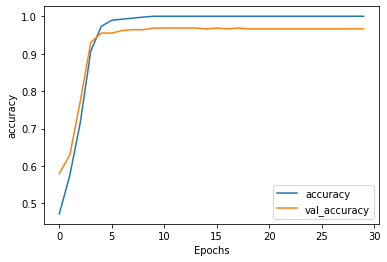

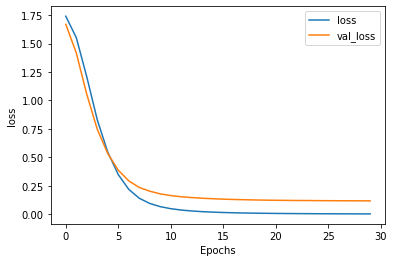

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#reversing words

In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv will radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite <OOV> us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked about technologies ces digital personal video recorders dvr pvr set top boxes like us s tivo uk s sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built in high definition tv sets big business japan us slower take off
tigers wary farrell  gamble  leicester say will not rushed making bid andy farrell great britain rugby league captain decide switch codes.   anybody else involved process still way away going next stage   ti

#Model weights

In [31]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 32)


#visualizations and files

In [32]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [33]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
sentence = ["online education is coming handy these days"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.0249203e-06 9.7799665e-01 1.3070103e-03 2.0673286e-02 1.6723203e-07
  1.5848818e-05]]


classify it as business followed by tech which is accurate

#Visualization:
follow [this link](https://projector.tensorflow.org/) and upload vec.tsv and meta.tsv to visualization use t-sne as decomposition method

#Written by : SATYAJIT MAITRA
## follow github: https://github.com/MachineLearningWithHuman/
## Email for work : ssatyajitmaitra@gmail.com
##learn with me on youtube: https://www.youtube.com/channel/UCiWd572-4LeH0IqJ5A7LavA/
### please give a star if it helps you 